In [64]:
import pandas as pd
from sqlalchemy import create_engine

In [65]:
csv_file = "netflix_titles.csv"
titles_df = pd.read_csv(csv_file)
titles_df.head()
csv_file2 = "netflix_expansion.csv"
expansion_df = pd.read_csv(csv_file2)

In [66]:
titles_df["date_added"] = pd.to_datetime(titles_df['date_added'])
titles_df['year_added'] = titles_df['date_added'].dt.year
titles_df['month_added'] = titles_df['date_added'].dt.month
## dropping 'duration' column as its not necessary for this analysis

In [67]:
titles_df.drop(['director'], axis = 1, inplace = True)
titles_df.drop(['cast'], axis = 1, inplace = True)

In [68]:
titles_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


In [69]:
titles_df.drop(['description'], axis = 1, inplace = True)

In [70]:
print(titles_df['country'].value_counts())

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64


In [71]:
countries_expanded = titles_df['country'].str.split(',', expand=True)
countries_expanded.columns = ['Country'+str(i) for i in countries_expanded.columns]

countries_expanded_concat = pd.concat([titles_df,countries_expanded], axis=1)

year_country_produced_df = pd.melt(countries_expanded_concat, id_vars=['show_id','release_year','rating'], value_vars=countries_expanded.columns, var_name='Country Number', value_name='country').dropna()

C:\Users\jimmy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [72]:
year_country_produced_df.head()

,show_id,release_year,rating,Country Number,country
0,s1,2020,PG-13,Country0,United States
1,s2,2021,TV-MA,Country0,South Africa
4,s5,2021,TV-MA,Country0,India
7,s8,1993,TV-MA,Country0,United States
8,s9,2021,TV-14,Country0,United Kingdom


In [73]:
print(year_country_produced_df['country'].value_counts())
year_country_produced_df['country'] = year_country_produced_df['country'].str.strip()

United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
                  ... 
 Sri Lanka           1
Mozambique           1
 Palestine           1
 Cuba                1
 Mongolia            1
Name: country, Length: 197, dtype: int64


In [74]:
year_country_produced_df
year_country_produced_df['country'].replace({"United States" : "United States of America", "United Kingdom" : "United Kingdom (Great Britan)"}, inplace = True)

In [75]:
year_country_produced_df

,show_id,release_year,rating,Country Number,country
0,s1,2020,PG-13,Country0,United States of America
1,s2,2021,TV-MA,Country0,South Africa
4,s5,2021,TV-MA,Country0,India
7,s8,1993,TV-MA,Country0,United States of America
8,s9,2021,TV-14,Country0,United Kingdom (Great Britan)
...,...,...,...,...,...
78859,s8404,2014,PG-13,Country8,Germany
85496,s6234,2017,TV-MA,Country9,Sweden
87666,s8404,2014,PG-13,Country9,Netherlands
94303,s6234,2017,TV-MA,Country10,United States of America


In [76]:
output1 = pd.merge(year_country_produced_df, expansion_df, on ='country', how='left')
print(output1['country'].value_counts())

United States of America         3690
India                            1046
United Kingdom (Great Britan)     806
Canada                            445
France                            393
                                 ... 
Armenia                             1
Sri Lanka                           1
Cuba                                1
Nicaragua                           1
Mongolia                            1
Name: country, Length: 123, dtype: int64


In [77]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.graph_objects as go
import plotly.express as px

In [78]:
%matplotlib inline

In [82]:
rat = pd.DataFrame(
                titles_df.groupby('rating')['rating'].count().sort_values(ascending=False) )\
                .rename(columns = {'rating':'count'})\
                .reset_index()
    
rat['ratio'] = rat['count'] / rat['count'].sum()
rat.style.bar(subset=['ratio'], color='#de92c7')

,rating,count,ratio
0,TV-MA,3207,0.364308
1,TV-14,2160,0.245371
2,TV-PG,863,0.098035
3,R,799,0.090765
4,PG-13,490,0.055663
5,TV-Y7,334,0.037942
6,TV-Y,307,0.034874
7,PG,287,0.032603
8,TV-G,220,0.024991
9,NR,80,0.009088


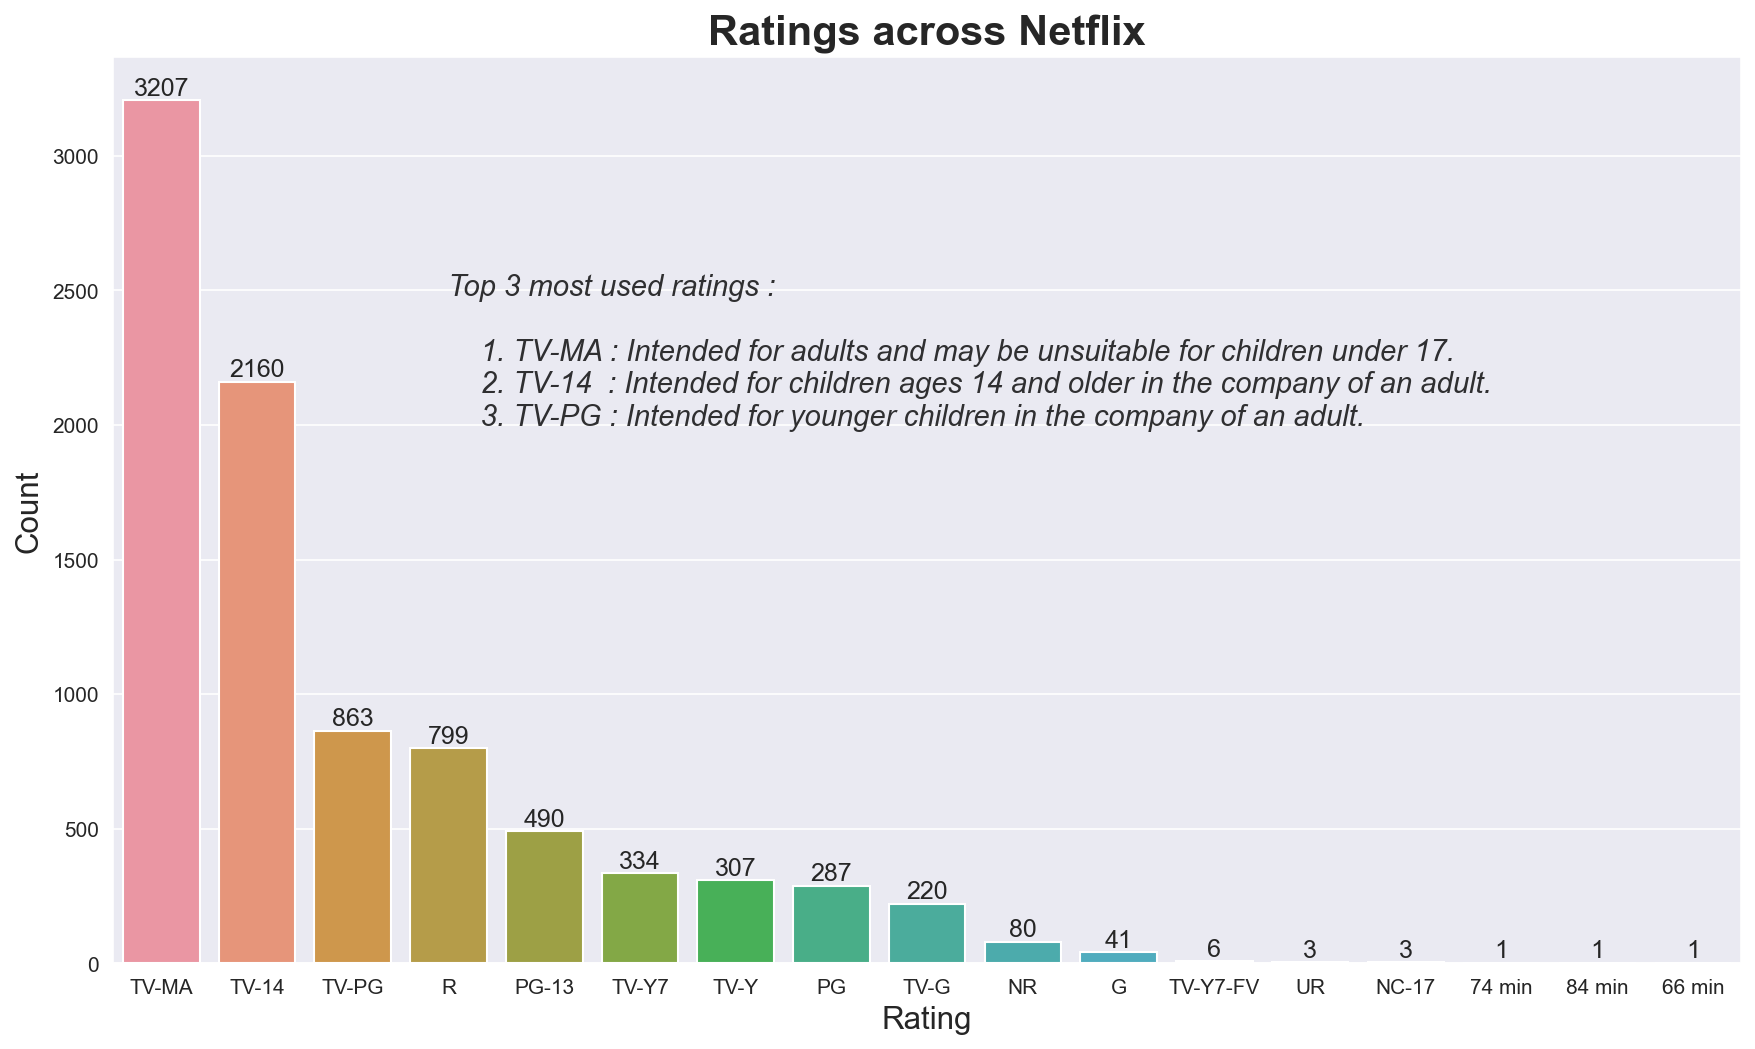

In [83]:
plt.figure(figsize = (14,8), dpi=150)

graph = sns.countplot(x='rating', data = titles_df, order=rat.rating)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Ratings across Netflix', fontsize=20, weight='semibold')

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 20, height , ha="center", fontsize=12)

text3 = 'Top 3 most used ratings :\n\n    1. TV-MA : Intended for adults and may be unsuitable for children under 17.\n    2. TV-14  : Intended for children ages 14 and older in the company of an adult.\n    3. TV-PG : Intended for younger children in the company of an adult.'
plt.text(3, 2000, text3, horizontalalignment='left', size='small', color='black', fontsize=14, alpha=0.8, fontstyle='italic')
plt.show()

In [43]:
engine = create_engine('sqlite:///titles_country_year.db', echo=True)
sqlite_connection = engine.connect()

In [44]:
sqlite_table = "Main Netflix"
output1.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2021-10-31 19:18:29,555 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Main Netflix")
2021-10-31 19:18:29,556 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-31 19:18:29,558 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Main Netflix")
2021-10-31 19:18:29,559 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-31 19:18:29,561 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Main Netflix" (
	"index" BIGINT, 
	show_id TEXT, 
	release_year BIGINT, 
	rating TEXT, 
	"Country Number" TEXT, 
	country TEXT, 
	"ISO" TEXT, 
	country_added FLOAT, 
	"Unnamed: 3" FLOAT
)


2021-10-31 19:18:29,562 INFO sqlalchemy.engine.Engine [no key 0.00080s] ()
2021-10-31 19:18:29,568 INFO sqlalchemy.engine.Engine COMMIT
2021-10-31 19:18:29,569 INFO sqlalchemy.engine.Engine CREATE INDEX "ix_Main Netflix_index" ON "Main Netflix" ("index")
2021-10-31 19:18:29,570 INFO sqlalchemy.engine.Engine [no key 0.00060s] ()
2021-10-31 19:18:29,575 INFO sqlalchemy.engine.Engine COMMIT
2021-10-31 19:18:29,583 INFO s

In [45]:
sqlite_connection.close()

In [50]:
database_path = "titles_country_year.sqlite"
engine = create_engine(f"sqlite:///{database_path}")

In [51]:
output1.to_sql(name='MainNetflix', con=engine, if_exists='append', index=False)

In [52]:
engine.table_names()

C:\Users\jimmy\AppData\Local\Temp/ipykernel_15676/4162273999.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['MainNetflix']

In [53]:
pd.read_sql_query('select * from MainNetflix limit 50', con=engine).head()

,show_id,release_year,rating,Country Number,country,ISO,country_added,Unnamed: 3
0,s1,2020,PG-13,Country0,United States of America,USA,1998.0,None
1,s2,2021,TV-MA,Country0,South Africa,ZAF,2016.0,None
2,s5,2021,TV-MA,Country0,India,IND,2016.0,None
3,s8,1993,TV-MA,Country0,United States of America,USA,1998.0,None
4,s9,2021,TV-14,Country0,United Kingdom (Great Britan),None,NaN,None


In [63]:
output1.to_csv('output1.csv')